In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
T=4
a=0.06
b=0.1
h=0.5
xi_0=500

### True solution

In [3]:
W = [0]
for i in range(int(T//h)):
    W.append(W[-1] + np.random.normal(loc=0, scale=h**0.5))
dW = [W[i+1] - W[i] for i in range(int(T//h))]
print(W)

[0, 0.632987591328824, 1.563110606501494, 1.157486665614492, 0.6648799786276826, -0.037051475154605495, -0.3413981277581853, -0.5355240905769505, -0.618210364853323]


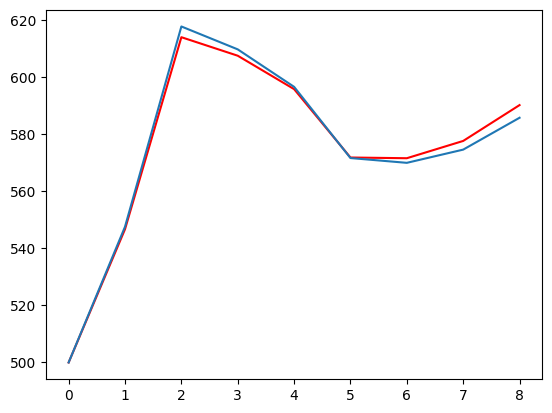

In [4]:
true_sol = [xi_0 * np.exp((a-b**2/2 ) * i*h + b*W[i]) for i in range(int(T//h)+1)]

euler_murayama = [xi_0]
for i in range(int(T//h)):
    xi_t = euler_murayama[-1]
    euler_murayama.append(xi_t + xi_t*a*h + xi_t*b*dW[i] )

plt.plot(euler_murayama, color="r")
plt.plot(true_sol)
plt.show()

In [5]:
N = 200
W = [np.zeros(N)]
for i in range(int(T//h)):
    W.append(W[-1] + np.random.normal(loc=0, scale=h**0.5, size=N))

dW = [W[i+1] - W[i] for i in range(int(T//h))]
print(np.stack(W).shape)
print(np.stack(dW).shape)

(9, 200)
(8, 200)


### Change of volatility

In [6]:
true_sol = [xi_0 * np.exp((a-b**2/2 ) * i*h + b*W[i]) for i in range(int(T//h)+1)]

euler_murayama = [xi_0 + W[0]]
for i in range(int(T//h)):
    xi_t = euler_murayama[-1]
    euler_murayama.append(xi_t + xi_t*a*h + xi_t*b*dW[i] )

print(np.mean(np.abs(np.stack(euler_murayama) - np.stack(true_sol))[-1, :], axis=0))

5.811684305916855


In [7]:
b *= 2
true_sol = [xi_0 * np.exp((a-b**2/2 ) * i*h + b*W[i]) for i in range(int(T//h)+1)]

euler_murayama = [xi_0 + W[0]]
for i in range(int(T//h)):
    xi_t = euler_murayama[-1]
    euler_murayama.append(xi_t + xi_t*a*h + xi_t*b*dW[i] )

print(np.mean(np.abs(np.stack(euler_murayama) - np.stack(true_sol))[-1, :], axis=0))

19.49320966667325


### Rate of convergence

In [8]:
h_n = [0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
eps_n = []
for h in h_n:
    N = 200
    W = [np.zeros(N)]
    for i in range(int(T//h)):
        W.append(W[-1] + np.random.normal(loc=0, scale=h**0.5, size=N))

    dW = [W[i+1] - W[i] for i in range(int(T//h))]
    true_sol = [xi_0 * np.exp((a-b**2/2 ) * i*h + b*W[i]) for i in range(int(T//h)+1)]

    euler_murayama = [xi_0 + W[0]]
    for i in range(int(T//h)):
        xi_t = euler_murayama[-1]
        euler_murayama.append(xi_t + xi_t*a*h + xi_t*b*dW[i] )

    eps_n.append(np.mean(np.abs(np.stack(euler_murayama) - np.stack(true_sol))[-1, :], axis=0))

h_n = np.stack([np.ones(len(h_n)), np.log(np.array(h_n))], axis=1)
print(h_n)
eps_n = np.log(np.array(eps_n))
print(eps_n)
C_and_gamma = np.linalg.inv(h_n.T@h_n)@h_n.T@eps_n
print(C_and_gamma)
print("C:", np.exp(C_and_gamma[0]), "gamma:", C_and_gamma[1])

[[ 1.         -0.69314718]
 [ 1.         -1.38629436]
 [ 1.         -2.30258509]
 [ 1.         -2.99573227]
 [ 1.         -3.68887945]
 [ 1.         -4.60517019]
 [ 1.         -5.29831737]
 [ 1.         -5.99146455]]
[3.06648219 2.73917937 2.15983146 1.87272763 1.48353299 1.11026351
 0.82366563 0.35326265]
[3.3853348  0.49973806]
C: 29.52787713682225 gamma: 0.49973806337690496
